In [1]:
# Import Libraries
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad
import matplotlib.pyplot as plt

# **Inputs**

In [2]:
# Define Inputs

# Acceleration due to gravity (m/s^2)
g = 9.81

# End coordinates
x2 = 2.0
y2 = 3.0

# Iterations
n_iter = 1000

# **Helper Functions**



In [3]:
def func(x, f, fp):

    """
    The time integral to be minimized for a path f(x).
    """
    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))

In [4]:
def cycloid(x2, y2, n_iter):

    """
    Return the path of Brachistochrone curve from (0,0) to (x2, y2).
    The Brachistochrone curve is the path down which a bead will fall without
    friction between two points in the least time (an arc of a cycloid).
    It is returned as an array of N values of (x,y) between (0,0) and (x2,y2).

    """

    # Calculate theta2 from (x2, y2) numerically (by Newton-Rapheson method).
    def theta_func(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(theta_func, np.pi/2)

    # Calculate radius of the circle generating the cycloid.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, n_iter)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    # The time of travel
    T = theta2 * np.sqrt(R / g)
    print('T(cycloid) = {:.3f}'.format(T))
    return x, y, T

In [5]:
def linear(x2, y2, n_iter):

    """
    Return the path of a straight line from (0,0) to (x2, y2).
    """

    m = y2 / x2
    x = np.linspace(0, x2, n_iter)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    print('T(linear) = {:.3f}'.format(T))
    return x, y, T

In [6]:
def circle(x2, y2, n_iter):

    """
    Return the path of a circular arc between (0,0) to (x2, y2).
    """

    # Define integrands and differentials
    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    # Circle radius
    r = (x2**2 + y2**2)/2/x2
    x = np.linspace(0, x2, n_iter)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('T(circle) = {:.3f}'.format(T))

    return x, y, T

T(cycloid) = 0.897
T(circle) = 0.904
T(linear) = 0.940


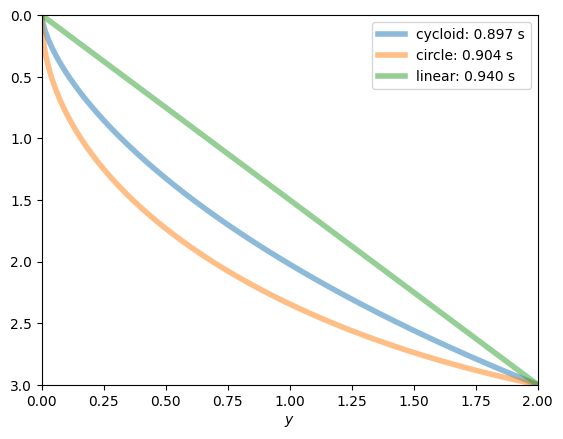

In [7]:
# Plot a figure comparing the four paths.
fig, ax = plt.subplots()

for curve in ('cycloid', 'circle', 'linear'):
    x, y, T = globals()[curve](x2, y2, n_iter)
    ax.plot(x, y, lw=4, alpha=0.5, label='{}: {:.3f} s'.format(curve, T))
ax.legend()

ax.set_xlabel('$x$')
ax.set_xlabel('$y$')
ax.set_xlim(0, x2)
ax.set_ylim(y2, 0)
plt.savefig('brachistochrone.png')
plt.show()